In [11]:
# load rdfcil implementation's class norm
import torch
import cl_lite.backbone as B
from cl_lite.head import DynamicSimpleHead
import sys
sys.path.append('..')
from rdfcil.datamodule import DataModule

num_tasks=5
num_classes=1000
t = num_tasks
dataset='imagenet1000'
class_order = [542, 618, 816, 68, 94, 215, 60, 585, 942, 165, 968, 829, 186, 661, 525, 982, 315, 52, 641, 797, 49, 40, 731, 260, 467, 563, 251, 595, 299, 187, 742, 997, 531, 802, 459, 349, 695, 159, 334, 50, 546, 196, 873, 181, 795, 433, 807, 691, 53, 624, 820, 440, 338, 327, 562, 374, 311, 197, 20, 377, 786, 184, 512, 859, 406, 271, 911, 629, 951, 482, 567, 633, 720, 728, 250, 84, 583, 396, 418, 297, 534, 245, 480, 170, 910, 600, 497, 382, 891, 67, 767, 732, 161, 234, 185, 775, 825, 926, 853, 31, 83, 664, 471, 642, 137, 26, 163, 778, 885, 553, 265, 979, 511, 640, 93, 429, 560, 946, 307, 99, 759, 470, 967, 934, 632, 204, 505, 180, 827, 208, 707, 354, 856, 524, 362, 703, 360, 188, 160, 782, 739, 613, 42, 384, 287, 8, 107, 724, 272, 989, 372, 915, 488, 704, 472, 597, 930, 124, 804, 685, 486, 516, 593, 499, 537, 25, 495, 594, 87, 834, 945, 233, 123, 296, 367, 509, 626, 588, 922, 183, 608, 996, 647, 48, 73, 446, 713, 178, 686, 63, 15, 77, 154, 734, 116, 858, 957, 41, 368, 774, 326, 273, 176, 961, 727, 190, 701, 714, 373, 314, 964, 148, 376, 447, 58, 275, 331, 596, 735, 678, 398, 88, 921, 65, 697, 601, 308, 491, 956, 276, 415, 468, 259, 150, 699, 940, 605, 421, 388, 669, 681, 508, 999, 210, 954, 655, 202, 281, 416, 175, 513, 984, 651, 606, 990, 448, 478, 635, 345, 100, 680, 819, 584, 46, 826, 56, 763, 340, 199, 779, 937, 682, 895, 616, 994, 980, 235, 361, 294, 749, 128, 501, 206, 938, 865, 902, 214, 718, 408, 652, 550, 420, 192, 168, 162, 350, 925, 203, 291, 404, 656, 410, 850, 357, 369, 551, 993, 748, 227, 610, 270, 108, 667, 47, 38, 860, 302, 267, 766, 896, 81, 962, 783, 705, 473, 221, 289, 86, 887, 280, 138, 844, 919, 676, 445, 888, 892, 544, 126, 385, 914, 106, 886, 901, 890, 932, 654, 322, 975, 174, 949, 815, 255, 658, 263, 874, 521, 504, 590, 708, 130, 522, 432, 793, 506, 897, 136, 266, 722, 153, 110, 257, 279, 133, 494, 884, 995, 125, 9, 514, 987, 242, 905, 213, 604, 799, 498, 434, 444, 425, 292, 758, 3, 688, 698, 674, 955, 442, 332, 988, 719, 428, 33, 226, 619, 157, 475, 225, 587, 439, 936, 29, 589, 706, 784, 212, 228, 117, 541, 342, 18, 417, 899, 864, 36, 625, 952, 861, 876, 931, 456, 752, 231, 325, 310, 532, 507, 881, 452, 684, 792, 243, 636, 769, 378, 262, 353, 492, 518, 768, 883, 4, 387, 424, 576, 109, 11, 438, 274, 223, 323, 781, 437, 236, 436, 12, 841, 131, 904, 570, 900, 304, 283, 716, 484, 122, 405, 913, 538, 603, 515, 127, 290, 230, 976, 730, 500, 998, 72, 401, 149, 764, 696, 831, 209, 523, 402, 811, 303, 787, 882, 319, 101, 578, 862, 463, 278, 663, 671, 738, 694, 79, 346, 66, 843, 268, 743, 709, 813, 810, 95, 264, 371, 637, 142, 381, 666, 380, 460, 750, 866, 286, 43, 469, 796, 772, 76, 28, 169, 917, 198, 172, 644, 485, 23, 848, 868, 923, 609, 269, 399, 75, 147, 679, 614, 628, 631, 950, 715, 496, 261, 867, 355, 972, 347, 833, 565, 98, 144, 412, 611, 453, 324, 561, 0, 575, 21, 702, 450, 528, 569, 313, 677, 218, 845, 790, 981, 851, 983, 668, 237, 740, 692, 571, 392, 113, 118, 824, 298, 765, 359, 54, 312, 295, 309, 805, 409, 135, 44, 339, 10, 670, 564, 344, 991, 193, 476, 241, 577, 726, 548, 906, 375, 683, 660, 238, 300, 155, 30, 545, 543, 536, 828, 140, 189, 78, 246, 59, 817, 580, 789, 427, 907, 305, 182, 971, 591, 336, 120, 893, 760, 449, 207, 530, 114, 403, 510, 27, 479, 285, 35, 773, 808, 370, 944, 166, 17, 337, 672, 321, 840, 112, 343, 533, 943, 320, 24, 721, 977, 935, 855, 164, 253, 430, 158, 800, 348, 880, 659, 687, 220, 413, 916, 798, 953, 847, 82, 389, 547, 39, 785, 474, 34, 141, 258, 306, 351, 121, 711, 85, 872, 244, 51, 777, 328, 517, 145, 352, 477, 89, 737, 91, 483, 751, 650, 970, 419, 191, 216, 167, 391, 379, 832, 143, 329, 646, 963, 487, 139, 689, 195, 249, 909, 854, 986, 929, 535, 173, 37, 941, 211, 657, 889, 958, 57, 451, 973, 5, 948, 823, 645, 729, 16, 356, 366, 812, 426, 301, 552, 803, 390, 397, 928, 22, 947, 443, 414, 836, 288, 490, 622, 177, 200, 252, 771, 555, 458, 755, 835, 365, 529, 620, 69, 6, 599, 341, 627, 394, 878, 852, 673, 842, 746, 582, 717, 364, 879, 700, 649, 745, 791, 648, 592, 780, 333, 316, 71, 152, 756, 801, 32, 849, 723, 744, 690, 924, 1, 912, 978, 573, 838, 201, 725, 282, 134, 317, 693, 821, 927, 407, 386, 489, 788, 857, 757, 818, 830, 959, 217, 247, 132, 540, 733, 869, 229, 171, 493, 457, 119, 194, 623, 103, 422, 464, 503, 411, 102, 502, 607, 639, 920, 92, 568, 558, 74, 933, 814, 960, 908, 615, 62, 903, 992, 383, 839, 363, 179, 974, 612, 423, 239, 939, 837, 248, 965, 205, 586, 64, 762, 871, 256, 526, 70, 461, 454, 634, 393, 794, 520, 156, 966, 675, 598, 462, 13, 90, 875, 55, 45, 643, 630, 753, 572, 19, 61, 104, 581, 602, 754, 665, 105, 435, 662, 559, 14, 863, 539, 519, 761, 232, 554, 441, 574, 747, 653, 877, 224, 293, 556, 358, 898, 806, 712, 254, 97, 710, 736, 621, 146, 465, 431, 330, 395, 129, 741, 579, 115, 111, 549, 80, 222, 617, 969, 809, 527, 776, 151, 822, 870, 240, 277, 7, 918, 466, 400, 557, 566, 846, 985, 481, 219, 318, 894, 2, 770, 335, 284, 638, 96, 455]

# dataload
data_module = DataModule(root='../rdfcil/data/', 
                        dataset=dataset, 
                        batch_size=128, 
                        num_workers=4,
                        num_tasks=num_tasks,
                        class_order=class_order,
                        current_task=t-1,
                        )
backbone = B.resnet.resnet18()
data_module.setup()
head = DynamicSimpleHead(num_classes=data_module.num_classes, num_features=backbone.num_features, bias=False)
# head = DynamicSimpleHead(num_classes=data_module.num_classes, num_features=backbone.num_features, bias=True)


ours_path = '/home/minsoo/workspace/AlwaysBeDreaming-DFCIL/yujin/version_598_imnet1k_iscf_5task_42.52/task_4/checkpoints/best_acc.ckpt'
rdfcil_path = '/home/minsoo/workspace/AlwaysBeDreaming-DFCIL/yujin/ImageNet-100/version_695_rdfcil_imnet1000_5t_19.53/task_4/checkpoints/best_acc.ckpt'

state_dict = torch.load(rdfcil_path)['state_dict']
# state_dict = torch.load(ours_path)['state_dict']
backbone_state= {}
head_state = {}
for _ in range(t-1):
    head.append(num_classes//num_tasks)
for k,v in state_dict.items():
    if k.startswith('backbone'):
        backbone_state[k[9:]] = v
    elif k.startswith('head'):
        head_state[k[5:]] = v
        # head_state[k[17:]] = v
        
    
backbone.load_state_dict(backbone_state)
backbone.eval()
head.load_state_dict(head_state)


# train_dataloader = data_module.train_dataloader()
val_dataloader = data_module.val_dataloader()

backbone.cuda()
head.cuda()

[542, 618, 816, 68, 94, 215, 60, 585, 942, 165, 968, 829, 186, 661, 525, 982, 315, 52, 641, 797, 49, 40, 731, 260, 467, 563, 251, 595, 299, 187, 742, 997, 531, 802, 459, 349, 695, 159, 334, 50, 546, 196, 873, 181, 795, 433, 807, 691, 53, 624, 820, 440, 338, 327, 562, 374, 311, 197, 20, 377, 786, 184, 512, 859, 406, 271, 911, 629, 951, 482, 567, 633, 720, 728, 250, 84, 583, 396, 418, 297, 534, 245, 480, 170, 910, 600, 497, 382, 891, 67, 767, 732, 161, 234, 185, 775, 825, 926, 853, 31, 83, 664, 471, 642, 137, 26, 163, 778, 885, 553, 265, 979, 511, 640, 93, 429, 560, 946, 307, 99, 759, 470, 967, 934, 632, 204, 505, 180, 827, 208, 707, 354, 856, 524, 362, 703, 360, 188, 160, 782, 739, 613, 42, 384, 287, 8, 107, 724, 272, 989, 372, 915, 488, 704, 472, 597, 930, 124, 804, 685, 486, 516, 593, 499, 537, 25, 495, 594, 87, 834, 945, 233, 123, 296, 367, 509, 626, 588, 922, 183, 608, 996, 647, 48, 73, 446, 713, 178, 686, 63, 15, 77, 154, 734, 116, 858, 957, 41, 368, 774, 326, 273, 176, 961, 727, 1

DynamicSimpleHead(
  (pool): AdaptiveAvgPool2d(output_size=1)
  (neck): Identity()
  (classifiers): ModuleList(
    (0): Linear(in_features=512, out_features=200, bias=False)
    (1): Linear(in_features=512, out_features=200, bias=False)
    (2): Linear(in_features=512, out_features=200, bias=False)
    (3): Linear(in_features=512, out_features=200, bias=False)
    (4): Linear(in_features=512, out_features=200, bias=False)
  )
)

In [12]:
head_class_norm = head.embeddings.norm(dim=1)
# shape of class norm
print(head_class_norm.shape)
torch.save(head_class_norm, 'imnet1k_5t_rdfcil_class_norm.pth')

torch.Size([1000])


In [17]:
# load class norms
rdfcil_class_norm = torch.load('imnet1k_5t_rdfcil_class_norm.pth',map_location='cpu').detach().numpy()
ours_class_norm = torch.load('imnet1k_5t_ours_class_norm.pth',map_location='cpu').detach().numpy()

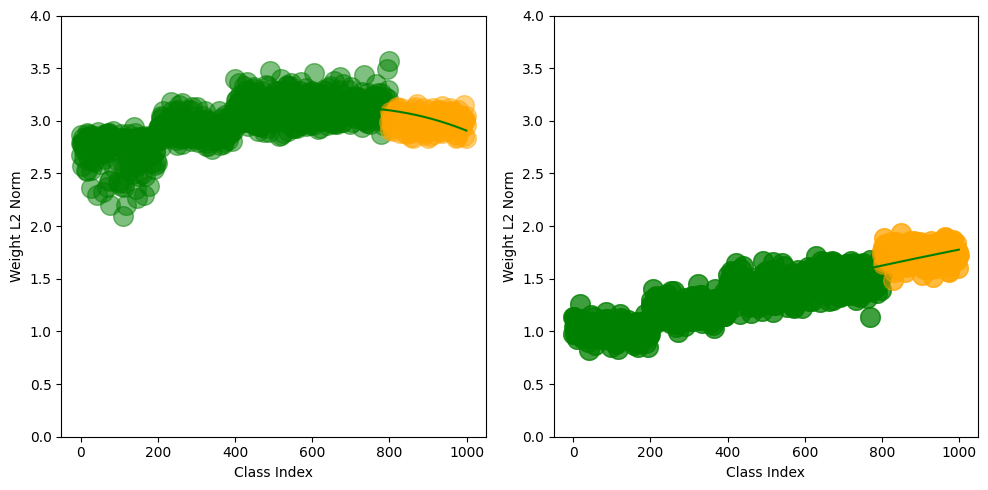

In [22]:
import matplotlib.pyplot as plt
import numpy as np
# Create a figure with subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
class_idx = np.arange(num_classes)

prev_classes = (t-1)*num_classes//num_tasks
# Scatter plot for our_class_norm
ax[0].scatter(class_idx[:prev_classes], ours_class_norm[:prev_classes], label='Our Class Norm (0-79)', color='green', alpha=0.5, s=200)
ax[0].scatter(class_idx[prev_classes:], ours_class_norm[prev_classes:], label='Our Class Norm (prev_classes-99)', color='orange', alpha=0.5, s=200)

# Scatter plot for rdfcil_class_norm
ax[1].scatter(class_idx[:prev_classes], rdfcil_class_norm[:prev_classes], label='RDFCIL Class Norm (0-79)', color='green', alpha=0.5, s=200)
ax[1].scatter(class_idx[prev_classes:], rdfcil_class_norm[prev_classes:], label='RDFCIL Class Norm (prev_classes-99)', color='orange', alpha=0.5, s=200)



# Fit a polynomial regression line
trendline = np.polyfit(class_idx, ours_class_norm, deg=3)
ax[0].plot(class_idx, np.polyval(trendline, class_idx), color='green', label='Trendline')
trendline = np.polyfit(class_idx, rdfcil_class_norm, deg=3)
ax[1].plot(class_idx, np.polyval(trendline, class_idx), color='green', label='Trendline')

# Plot the scatter plot with trendline
ax[1].scatter(class_idx[:prev_classes], rdfcil_class_norm[:prev_classes], label='RDFCIL Class Norm (0-79)', color='green', alpha=0.5, s=200)
ax[1].scatter(class_idx[prev_classes:], rdfcil_class_norm[prev_classes:], label='RDFCIL Class Norm (80-99)', color='orange', alpha=0.5, s=200)
# Set labels and legends
ax[0].set_xlabel('Class Index')
ax[0].set_ylabel('Weight L2 Norm')
ax[0].legend().set_visible(False)
ax[0].set_ylim(0,4)
ax[1].set_xlabel('Class Index')
ax[1].set_ylabel('Weight L2 Norm')
ax[1].legend().set_visible(False)
ax[1].set_ylim(0,4)

# Show the plot
plt.tight_layout()
plt.savefig('class_norm_imnet1k_5t.pdf',bbox_inches='tight')
plt.show()
